In [1]:
import os
import pandas as pd
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim


In [2]:
# Define paths
csv_path = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv"
image_dir = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/"

In [3]:
# Load CSV file
df = pd.read_csv(csv_path, on_bad_lines='skip')

In [4]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [5]:
df = pd.read_csv(csv_path, on_bad_lines='skip')

# Ensure 'id' column exists
if "id" not in df.columns:
    raise ValueError(f"Column 'id' not found in CSV. Available columns: {df.columns}")

missing_images = []

# Check if each image file exists
for image_id in df["id"]:
    filename = f"{image_id}.jpg"  # Construct image filename
    image_path = os.path.join(image_dir, filename)
    if not os.path.exists(image_path):
        missing_images.append(filename)

# Print results
if missing_images:
    print(f"Total missing images: {len(missing_images)}")
    print("Missing image files:", missing_images[:10])  # Show first 10 missing files
else:
    print("All images are present.")


Total missing images: 5
Missing image files: ['39403.jpg', '39410.jpg', '39401.jpg', '39425.jpg', '12347.jpg']


In [6]:
df = df[~df["id"].astype(str).isin(["39403", "39410", "39401", "39425", "12347"])]
df.to_csv("styles.csv", index=False)  

In [7]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [36]:
# Define paths
csv_path = "/kaggle/working/styles.csv"
image_dir = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/images"

In [37]:
df = pd.read_csv(csv_path, on_bad_lines='skip')


In [38]:

df = df[['id', 'baseColour', 'articleType', 'season', 'gender']].dropna()

# Convert categorical columns while keeping original labels
for col in ['baseColour', 'articleType', 'season', 'gender']:
    df[col] = df[col].astype("category")  # Convert to categorical type
    df[f"{col}_num"] = df[col].cat.codes  # Assign numerical values


# Print unique values along with their assigned numbers
for col in ['baseColour', 'articleType', 'season', 'gender']:
    unique_mapping = dict(zip(df[col].cat.categories, range(len(df[col].cat.categories))))
    print(f"Mapping for {col}:")
    for value, num in unique_mapping.items():
        print(f"{num} -> {value}")




Mapping for baseColour:
0 -> Beige
1 -> Black
2 -> Blue
3 -> Bronze
4 -> Brown
5 -> Burgundy
6 -> Charcoal
7 -> Coffee Brown
8 -> Copper
9 -> Cream
10 -> Fluorescent Green
11 -> Gold
12 -> Green
13 -> Grey
14 -> Grey Melange
15 -> Khaki
16 -> Lavender
17 -> Lime Green
18 -> Magenta
19 -> Maroon
20 -> Mauve
21 -> Metallic
22 -> Multi
23 -> Mushroom Brown
24 -> Mustard
25 -> Navy Blue
26 -> Nude
27 -> Off White
28 -> Olive
29 -> Orange
30 -> Peach
31 -> Pink
32 -> Purple
33 -> Red
34 -> Rose
35 -> Rust
36 -> Sea Green
37 -> Silver
38 -> Skin
39 -> Steel
40 -> Tan
41 -> Taupe
42 -> Teal
43 -> Turquoise Blue
44 -> White
45 -> Yellow
Mapping for articleType:
0 -> Accessory Gift Set
1 -> Baby Dolls
2 -> Backpacks
3 -> Bangle
4 -> Basketballs
5 -> Bath Robe
6 -> Beauty Accessory
7 -> Belts
8 -> Blazers
9 -> Body Lotion
10 -> Body Wash and Scrub
11 -> Booties
12 -> Boxers
13 -> Bra
14 -> Bracelet
15 -> Briefs
16 -> Camisoles
17 -> Capris
18 -> Caps
19 -> Casual Shoes
20 -> Churidar
21 -> Cloth

In [39]:
df = df[['id', 'baseColour', 'articleType', 'season', 'gender']].dropna()
for col in ["baseColour", "articleType", "season", "gender"]:
    df[col] = df[col].astype("category").cat.codes
df["image_path"] = df["id"].astype(str) + ".jpg"
df["full_path"] = df["image_path"].apply(lambda x: os.path.join(image_dir, x))
df = df[df["full_path"].apply(os.path.exists)].reset_index(drop=True)


In [40]:

df

,id,baseColour,articleType,season,gender,image_path,full_path
0,15970,25,104,0,2,15970.jpg,/kaggle/input/fashion-product-images-dataset/f...
1,39386,2,56,2,2,39386.jpg,/kaggle/input/fashion-product-images-dataset/f...
2,59263,37,139,3,4,59263.jpg,/kaggle/input/fashion-product-images-dataset/f...
3,21379,1,127,0,2,21379.jpg,/kaggle/input/fashion-product-images-dataset/f...
4,53759,13,133,2,2,53759.jpg,/kaggle/input/fashion-product-images-dataset/f...
...,...,...,...,...,...,...,...
44378,17036,44,19,2,2,17036.jpg,/kaggle/input/fashion-product-images-dataset/f...
44379,6461,33,39,2,2,6461.jpg,/kaggle/input/fashion-product-images-dataset/f...
44380,18842,2,133,0,2,18842.jpg,/kaggle/input/fashion-product-images-dataset/f...
44381,46694,2,91,1,4,46694.jpg,/kaggle/input/fashion-product-images-dataset/f...


In [41]:
class FashionDataset(Dataset):
    def __init__(self, dataframe, label_mappings, image_dir, transform=None):
        self.dataframe = dataframe
        self.label_mappings = label_mappings
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx]["image_path"]
        img_path = os.path.join(self.image_dir, img_name)  # Ensure correct path
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        try:
            labels = torch.tensor([
                self.label_mappings["baseColour"][self.dataframe.iloc[idx]["baseColour"]],
                self.label_mappings["articleType"][self.dataframe.iloc[idx]["articleType"]],
                self.label_mappings["season"][self.dataframe.iloc[idx]["season"]],
                self.label_mappings["gender"][self.dataframe.iloc[idx]["gender"]]
            ], dtype=torch.long)
        except KeyError as e:
            print(f"Error: Label {e} not found in mappings. Check label_mappings dictionary.")
            raise

        return image, labels


In [42]:
# Define label mappings
label_mappings = {
    "baseColour": {color: idx for idx, color in enumerate(df["baseColour"].unique())},
    "articleType": {typ: idx for idx, typ in enumerate(df["articleType"].unique())},
    "season": {season: idx for idx, season in enumerate(df["season"].unique())},
    "gender": {gender: idx for idx, gender in enumerate(df["gender"].unique())},
}

In [43]:
# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


dataset = FashionDataset(df, label_mappings, image_dir, transform=transform)

# Split into train & validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)



In [44]:
class MultiLabelResNet(nn.Module):
    def __init__(self, base_model, num_classes_dict):
        super(MultiLabelResNet, self).__init__()
        self.base_model = base_model
        num_ftrs = self.base_model.fc.in_features
        self.base_model.fc = nn.Identity()  # Remove default FC layer
        
        # Create separate FC layers for each category
        self.fc_layers = nn.ModuleDict({
            key: nn.Linear(num_ftrs, num_classes) for key, num_classes in num_classes_dict.items()
        })

    def forward(self, x):
        x = self.base_model(x)  # Extract features
        return {key: self.fc_layers[key](x) for key in self.fc_layers}  # Output per category


In [45]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes_dict = {key: len(label_mappings[key]) for key in label_mappings}
base_model = models.resnet18(pretrained=True)
model = MultiLabelResNet(base_model, num_classes_dict).to(device)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [46]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [47]:
import torch
print(torch.cuda.is_available())  # Should return True
print(torch.cuda.device_count())  # Should be > 0
print(torch.cuda.current_device())  # Should return GPU index
print(torch.cuda.get_device_name(0))  # Should return your GPU model
print(torch.__version__)  # Check if PyTorch version supports CUDA


True
2
0
Tesla T4
2.5.1+cu121


In [48]:
torch.backends.cudnn.benchmark = True  # Optimizes GPU usage
torch.cuda.empty_cache()  # Clears unused memory


In [49]:
def train(model, train_loader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    correct = {key: 0 for key in label_mappings}
    total = 0

    for images, labels in train_loader:
        images = images.to(device)  # Move images to GPU
        labels = labels.to(device)  # Move labels to GPU

        optimizer.zero_grad()
        outputs = model(images)

        loss = sum(criterion(outputs[key], labels[:, i]) for i, key in enumerate(label_mappings))
        
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        total += labels.size(0)
        
        for i, key in enumerate(label_mappings):
            correct[key] += (outputs[key].argmax(dim=1) == labels[:, i]).sum().item()

    avg_train_loss = running_loss / total
    train_accuracy = {key: 100 * correct[key] / total for key in label_mappings}
    return avg_train_loss, train_accuracy


In [50]:
def validate(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    correct = {key: 0 for key in label_mappings}
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            loss = sum(criterion(outputs[key], labels[:, i]) for i, key in enumerate(label_mappings))

            val_loss += loss.item() * images.size(0)
            total += labels.size(0)
            
            for i, key in enumerate(label_mappings):
                correct[key] += (outputs[key].argmax(dim=1) == labels[:, i]).sum().item()

    avg_val_loss = val_loss / total
    val_accuracy = {key: 100 * correct[key] / total for key in label_mappings}
    return avg_val_loss, val_accuracy


In [78]:
epochs = 15
for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")

    train_loss, train_acc = train(model, train_loader, criterion, optimizer)
    val_loss, val_acc = validate(model, val_loader, criterion)

    print(f"Training Loss: {train_loss:.2f}")
    for key in train_acc:
        print(f"Training Accuracy ({key}): {train_acc[key]:.2f}%")

    print(f"Validation Loss: {val_loss:.2f}")
    for key in val_acc:
        print(f"Validation Accuracy ({key}): {val_acc[key]:.2f}%")


Epoch 1/15
Training Loss: 1.41
Training Accuracy (baseColour): 77.32%
Training Accuracy (articleType): 93.00%
Training Accuracy (season): 84.38%
Training Accuracy (gender): 95.65%
Validation Loss: 2.60
Validation Accuracy (baseColour): 66.13%
Validation Accuracy (articleType): 86.61%
Validation Accuracy (season): 77.17%
Validation Accuracy (gender): 92.54%

Epoch 2/15
Training Loss: 1.11
Training Accuracy (baseColour): 81.74%
Training Accuracy (articleType): 94.77%
Training Accuracy (season): 87.98%
Training Accuracy (gender): 96.68%
Validation Loss: 2.87
Validation Accuracy (baseColour): 65.33%
Validation Accuracy (articleType): 85.84%
Validation Accuracy (season): 76.29%
Validation Accuracy (gender): 91.66%

Epoch 3/15
Training Loss: 0.85
Training Accuracy (baseColour): 85.71%
Training Accuracy (articleType): 95.84%
Training Accuracy (season): 91.21%
Training Accuracy (gender): 97.54%
Validation Loss: 3.07
Validation Accuracy (baseColour): 64.37%
Validation Accuracy (articleType): 8

In [88]:
# Convert label mappings to dictionaries for easier lookup
reverse_label_mappings = {
    "baseColour": {
        0: "Beige", 1: "Black", 2: "Blue", 3: "Bronze", 4: "Brown", 5: "Burgundy",
        6: "Charcoal", 7: "Coffee Brown", 8: "Copper", 9: "Cream", 10: "Fluorescent Green",
        11: "Gold", 12: "Green", 13: "Grey", 14: "Grey Melange", 15: "Khaki", 16: "Lavender",
        17: "Lime Green", 18: "Magenta", 19: "Maroon", 20: "Mauve", 21: "Metallic",
        22: "Multi", 23: "Mushroom Brown", 24: "Mustard", 25: "Navy Blue", 26: "Nude",
        27: "Off White", 28: "Olive", 29: "Orange", 30: "Peach", 31: "Pink", 32: "Purple",
        33: "Red", 34: "Rose", 35: "Rust", 36: "Sea Green", 37: "Silver", 38: "Skin",
        39: "Steel", 40: "Tan", 41: "Taupe", 42: "Teal", 43: "Turquoise Blue",
        44: "White", 45: "Yellow"
    },
    
    "articleType": {
        0: "Accessory Gift Set", 1: "Baby Dolls", 2: "Backpacks", 3: "Bangle",
        4: "Basketballs", 5: "Bath Robe", 6: "Beauty Accessory", 7: "Belts"
    },
    
    "season": {
        0: "Fall", 1: "Spring", 2: "Summer", 3: "Winter"
    },
    
    "gender": {
        0: "Boys", 1: "Girls", 2: "Men", 3: "Unisex", 4: "Women"
    },
}

In [110]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as transforms


# Function to make a prediction on a single image
def predict_image(model, image_path, reverse_label_mappings, device):
    model.eval()  # Set model to evaluation mode

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])

    # Load and preprocess image
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(device)

    # Perform inference
    with torch.no_grad():
        output = model(image)

        # Check if model output is a dictionary (multi-task models)
        if isinstance(output, dict):
            predictions = {key: torch.argmax(output[key], dim=1).item() for key in output}
        else:
            predictions = torch.argmax(output, dim=1).tolist()

    # Decoding Predictions
    decoded_preds = {
        "Gender": reverse_label_mappings["gender"].get(predictions.get("gender", 0), "Unknown"),
        "Category": reverse_label_mappings["articleType"].get(predictions.get("articleType", 0), "Unknown"),
        "Season": reverse_label_mappings["season"].get(predictions.get("season", 0), "Unknown"),
        "Color": reverse_label_mappings["baseColour"].get(predictions.get("baseColour", 0), "Unknown"),
    }

    # Display image with predictions
    plt.imshow(Image.open(image_path))
    plt.title(f"Predicted: {decoded_preds}")
    plt.axis("off")
    plt.show()

    return decoded_preds



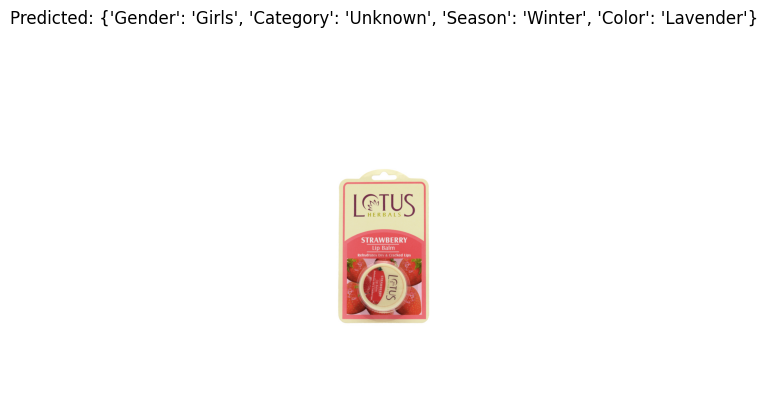

Predicted Details: {'Gender': 'Girls', 'Category': 'Unknown', 'Season': 'Winter', 'Color': 'Lavender'}


In [130]:
random_index = random.randint(0, len(df) - 1)
test_image = df.iloc[random_index]["full_path"]
predictions = predict_image(model, test_image, reverse_label_mappings, device)
print(f"Predicted Details: {predictions}")

**Testing with Amazon Products**

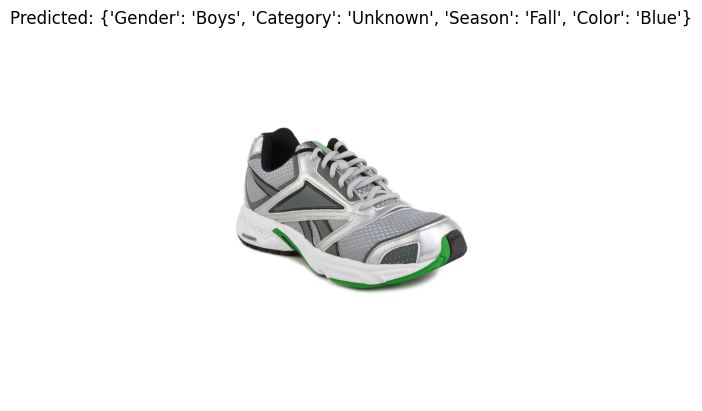

In [126]:
# Correcting variable assignment
image_file_path = '/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/10088.jpg'
image_path = image_file_path
predictions = predict_image(model, image_path, reverse_label_mappings, device)



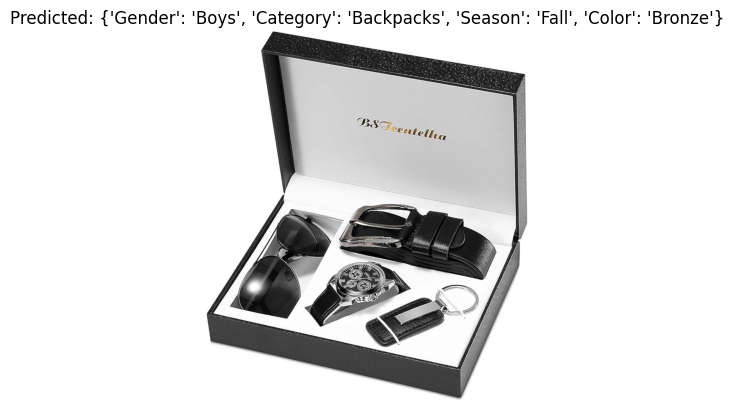

Predicted Details for 71QrCQQzXAL._AC_UY1000_.jpg: {'Gender': 'Boys', 'Category': 'Backpacks', 'Season': 'Fall', 'Color': 'Bronze'}


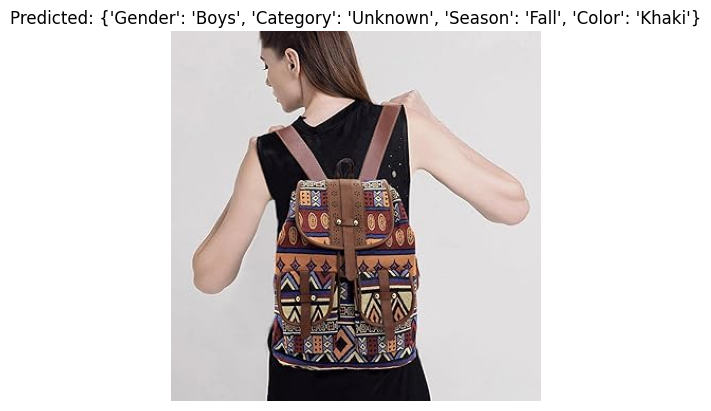

Predicted Details for 71xIfUQmyML._AC_UY350_.jpg: {'Gender': 'Boys', 'Category': 'Unknown', 'Season': 'Fall', 'Color': 'Khaki'}


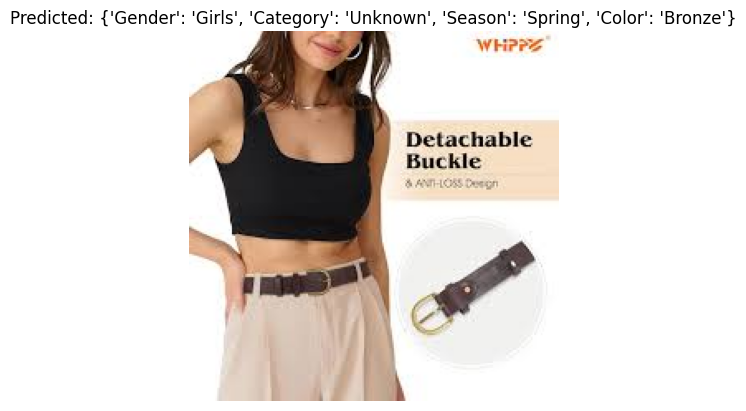

Predicted Details for 1.jpg: {'Gender': 'Girls', 'Category': 'Unknown', 'Season': 'Spring', 'Color': 'Bronze'}


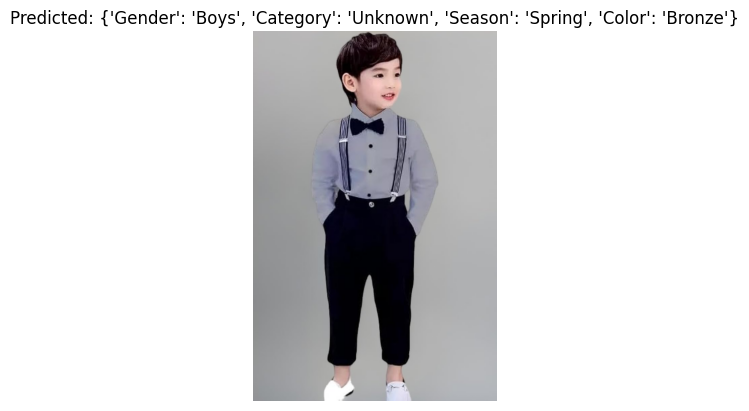

Predicted Details for 51uOkBmCSwL._AC_UY1100_.jpg: {'Gender': 'Boys', 'Category': 'Unknown', 'Season': 'Spring', 'Color': 'Bronze'}


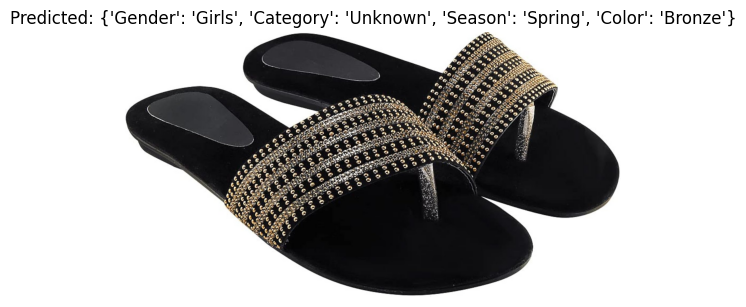

Predicted Details for 61g5cwGIPUL._AC_UY1000_.jpg: {'Gender': 'Girls', 'Category': 'Unknown', 'Season': 'Spring', 'Color': 'Bronze'}


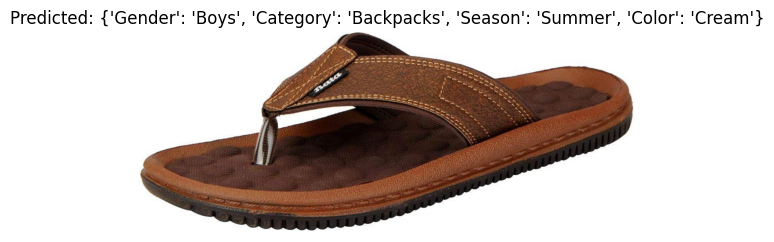

Predicted Details for 61k8GurAcuL._AC_UY1000_.jpg: {'Gender': 'Boys', 'Category': 'Backpacks', 'Season': 'Summer', 'Color': 'Cream'}


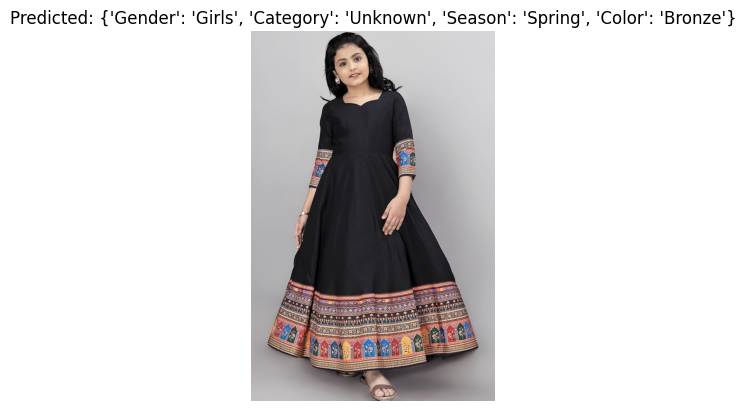

Predicted Details for 91BQQavz3jL._AC_UY1100_.jpg: {'Gender': 'Girls', 'Category': 'Unknown', 'Season': 'Spring', 'Color': 'Bronze'}


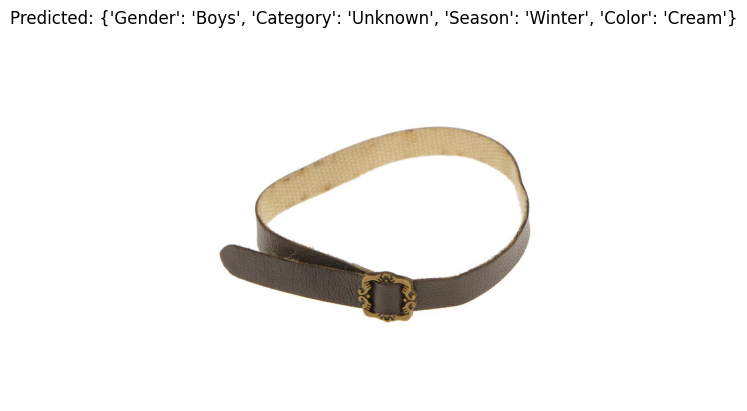

Predicted Details for 51OPcPzh1L.jpg: {'Gender': 'Boys', 'Category': 'Unknown', 'Season': 'Winter', 'Color': 'Cream'}


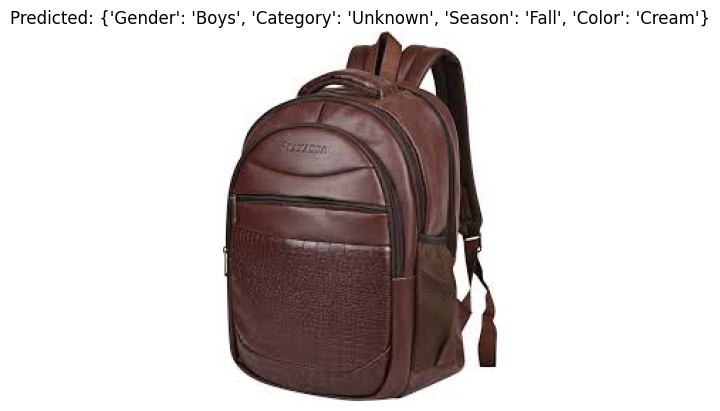

Predicted Details for images.jpg: {'Gender': 'Boys', 'Category': 'Unknown', 'Season': 'Fall', 'Color': 'Cream'}


In [96]:
image_file_path = '/kaggle/input/amazon/Amazon product testing'

for image_name in os.listdir(image_file_path):
    image_path = os.path.join(image_file_path, image_name)
    if image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        predictions = predict_image(model, image_path, reverse_label_mappings, device)
        print(f"Predicted Details for {image_name}: {predictions}")